In [54]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [55]:
def lateral_inh_3d(img_arr, w):
    img_arr=np.transpose(img_arr, (2,0,1))
    kernal=np.zeros([3,3,3])
    npad=((0,0),
            (int((kernal.shape[1]-1)/2),int((kernal.shape[1]-1)/2)),
            (int((kernal.shape[2]-1)/2),int((kernal.shape[2]-1)/2))
            )
    img_out=np.pad(img_arr*1., npad)
    
    for i in range(img_arr.shape[1]):
        for j in range(img_arr.shape[2]):
            x0=img_arr[0,i,j]
            x1=img_arr[1,i,j]
            x2=img_arr[2,i,j]
            kernal=np.array([[[x0*w,x0*w,x0*w],
                        [x0*w,0,x0*w],
                        [x0*w,x0*w,x0*w]],
                        [[x1*w,x1*w,x1*w],
                        [x1*w,0,x1*w],
                        [x1*w,x1*w,x1*w]],
                        [[x2*w,x2*w,x2*w],
                        [x2*w,0,x2*w],
                        [x2*w,x2*w,x2*w]]])
            
            img_out[0:3,i:i+3,j:j+3] = img_out[0:3,i:i+3,j:j+3]+kernal
    img_out=np.transpose(img_out, (1,2,0))
    img_out=img_out.astype(int)
    img_out[img_out<0]=0
    return img_out

In [116]:
def downsample_2d(img_arr, x):
    return img_arr[::x,::x]

def lateral_inh_2d(img_arr, w):
    kernal=np.zeros([3,3])
    img_out=np.pad(img_arr*1., (1,1))

    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            x=img_arr[i,j]
            kernal=np.array([[x*w,x*w,x*w],
                        [x*w,0,x*w],
                        [x*w,x*w,x*w]]
                        )
            img_out[i:i+3,j:j+3] = img_out[i:i+3,j:j+3]+kernal
    img_out=img_out.astype(int)
    img_out[img_out<0]=0
    return img_out

def lateral_inh_2d_gan(img_arr, w_exc, w_inh):
    img_out=np.pad(img_arr*1., (1,1))
    out=np.array([])
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):

            inh = w_inh*(np.sum(img_out[i:i+3,j:j+3])-img_out[i+1,j+1])
            exc = w_exc*img_out[i+1,j+1]
            gan = exc-inh
            
            out = np.concatenate((out, np.array([gan])))
    out=out.astype(int)
    out[out<0]=0
    out = np.reshape(out, (img_arr.shape[0], img_arr.shape[1]))
    return out 

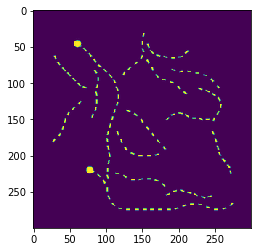

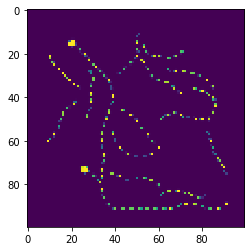

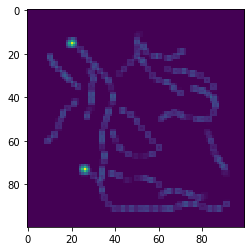

In [135]:
img = Image.open('sample_0.png')
img_arr = np.array(img)
img_down = downsample_2d(img_arr, 3)
img_out = lateral_inh_2d_gan(img_down, w_exc=10, w_inh=-15)
plt.imshow(img_arr, interpolation='None')
plt.show()
plt.imshow(img_down, interpolation='None')
plt.show()
plt.imshow(img_out, interpolation='None')
plt.show()

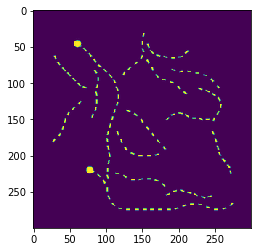

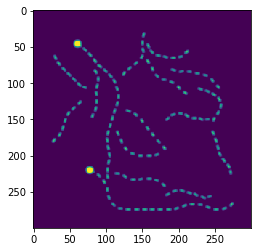

In [129]:
img = Image.open('sample_0.png')
img_arr = np.array(img)
img_out = lateral_inh_2d_gan(img_arr, w_exc=1, w_inh=-100)
plt.imshow(img_arr, interpolation='None')
plt.show()
plt.imshow(img_out, interpolation='None')
plt.show()

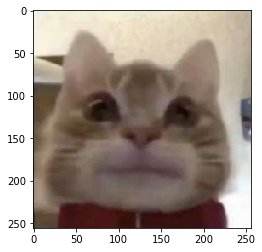

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


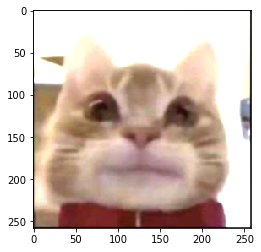

In [38]:
img = Image.open('cat.jpeg')
img_arr = np.array(img)
img_out = lateral_inh_3d(img_arr, 0.09)
img_out = lateral_inh_3d(img_arr, 0.09)
img_out = lateral_inh_3d(img_arr, 0.09)
img_out = lateral_inh_3d(img_arr, 0.09)

plt.imshow(img_arr, interpolation='None')
plt.show()
plt.imshow(img_out, interpolation='None')
plt.show()

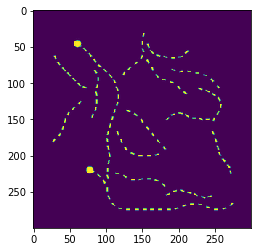

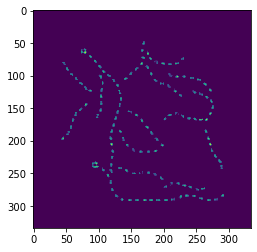

In [53]:
img = Image.open('sample_0.png')
img_arr = np.array(img)
img_out = lateral_inh_2d(img_arr, 10)
img_out = lateral_inh_2d(img_out, 10)
img_out = lateral_inh_2d(img_out, 10)
img_out = lateral_inh_2d(img_out, 10)
img_out = lateral_inh_2d(img_out, 10)
img_out = lateral_inh_2d(img_out, 10)
img_out = lateral_inh_2d(img_out, 1)
img_out = lateral_inh_2d(img_out, 1)
img_out = lateral_inh_2d(img_out, 1)
img_out = lateral_inh_2d(img_out, 1)
img_out = lateral_inh_2d(img_out, -0.1)
img_out = lateral_inh_2d(img_out, -0.1)
img_out = lateral_inh_2d(img_out, -0.1)
img_out = lateral_inh_2d(img_out, -0.1)
img_out = lateral_inh_2d(img_out, -0.1)
img_out = lateral_inh_2d(img_out, -0.1)
img_out = lateral_inh_2d(img_out, -0.1)
plt.imshow(img_arr, interpolation='None')
plt.show()
plt.imshow(img_out, interpolation='None')
plt.show()

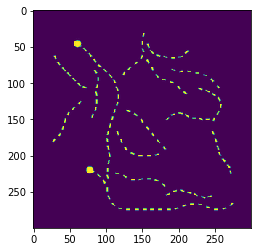

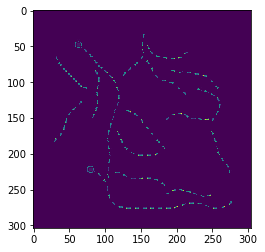

In [47]:
img = Image.open('sample_0.png')
img_arr = np.array(img)
img_out = lateral_inh_2d(img_arr, -0.1)
img_out = lateral_inh_2d(img_out, -0.1)


plt.imshow(img_arr, interpolation='None')
plt.show()
plt.imshow(img_out, interpolation='None')
plt.show()

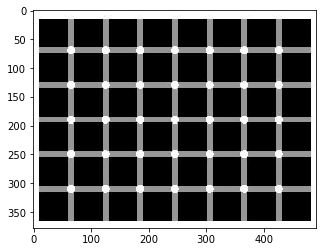

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


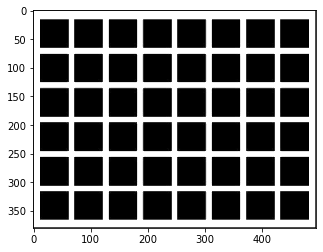

In [37]:
img = Image.open('HermannGrid.jpg')
img_arr = np.array(img)
img_out = lateral_inh_3d(img_arr, 0.1)
plt.imshow(img_arr, interpolation='None')
plt.show()
plt.imshow(img_out, interpolation='None')
plt.show()

In [143]:
import glob
x=glob.glob('/Users/yuantang/Documents/GitHub/marked_long/*.jpg')
with open(r'/Users/yuantang/Documents/GitHub/marked_long/list.txt', 'w') as fp:
    for item in x:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done
